In [1]:
import pandas as pd

In [3]:
import re

In [5]:
import seaborn as sns  # 그래프를 그리기 위한 seaborn 라이브러리 임포트

In [7]:
import matplotlib.pyplot as plt  # 그래프 표시를 위한 pyplot 임포트

In [9]:
# 데이터셋 불러오기
df = pd.read_csv("netflix_reviews.csv")

In [11]:
# 데이터프레임의 상단 5개 데이터 출력
print("상단 5개 데이터:")
print(df.head())

상단 5개 데이터:
                               reviewId         userName  \
0  516f368f-72d8-4abf-9400-e066f2f07b42     Rakesh Patel   
1  66d0176c-3838-4ecc-aead-d10588ec6887  Tabassum Kausar   
2  a3c8308c-eed0-4cbb-adab-6a076f48a7ab            Hi mu   
3  6c6cd609-cfb2-4a7e-b35f-48b289e2984a          Brian C   
4  641edd00-95ec-4214-a03f-60fccafbbb8e     Evans Mgeusa   

                                             content  score  thumbsUpCount  \
0                                                 Ok      5              0   
1  Only problem is that we can't search year wise...      3              0   
2                                             Good 💜      5              0   
3            Can't cast to Chromecast. Unacceptable.      1              0   
4                                            Amazing      5              0   

    reviewCreatedVersion                   at             appVersion  
0  8.137.0 build 4 50942  2024-10-27 13:54:52  8.137.0 build 4 50942  
1  8.137.0 build 

In [13]:
# 데이터프레임의 하단 5개 데이터 출력
print("\n하단 5개 데이터:")
print(df.tail())



하단 5개 데이터:
                                    reviewId       userName  \
117640  a760ead9-e7aa-4ed1-a651-5c37c3600dac  A Google user   
117641  4957f9e7-d7f4-4a52-9764-031cebcac83f   Captain Jeoy   
117642  9acf7586-7abf-4b50-8c50-3ede3b2a42c4       Suryansh   
117643  32870f7f-c461-4256-b602-75244ca60248  A Google user   
117644  dc1352e9-10a8-41ca-ab23-05d045b08e90     suraj soni   

                                                  content  score  \
117640  i really like it! there are so many movies and...      5   
117641   I love Netflix. I always enjoy my time using it.      5   
117642               Sound quality is very slow of movies      1   
117643  Rate is very expensive.. bcos we see netflix s...      1   
117644  this app is awesome for english movies ,series...      4   

        thumbsUpCount   reviewCreatedVersion                   at  \
117640              0                    NaN  2019-08-03 15:06:03   
117641              0   8.34.0 build 4 50250  2022-08-15 16:16

In [15]:
# 데이터프레임의 shape 출력
print("\nShape of the dataset:", df.shape)


Shape of the dataset: (117645, 8)


In [17]:
# 데이터프레임의 컬럼 출력
print("Columns in the dataset:", df.columns)

Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [19]:
# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

In [21]:
# 리뷰 데이터 전처리
df['cleaned_content'] = df['content'].apply(preprocess_text)

In [23]:
# 전처리된 데이터 확인
print("\n전처리된 상단 5개 데이터:")
print(df[['content', 'cleaned_content']].head())


전처리된 상단 5개 데이터:
                                             content  \
0                                                 Ok   
1  Only problem is that we can't search year wise...   
2                                             Good 💜   
3            Can't cast to Chromecast. Unacceptable.   
4                                            Amazing   

                                     cleaned_content  
0                                                 ok  
1  only problem is that we cant search year wise ...  
2                                               good  
3               cant cast to chromecast unacceptable  
4                                            amazing  


/var/folders/kc/fbdkhfks4cdgdytczn417j3m0000gn/T/ipykernel_87760/2737673158.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df, palette='viridis')


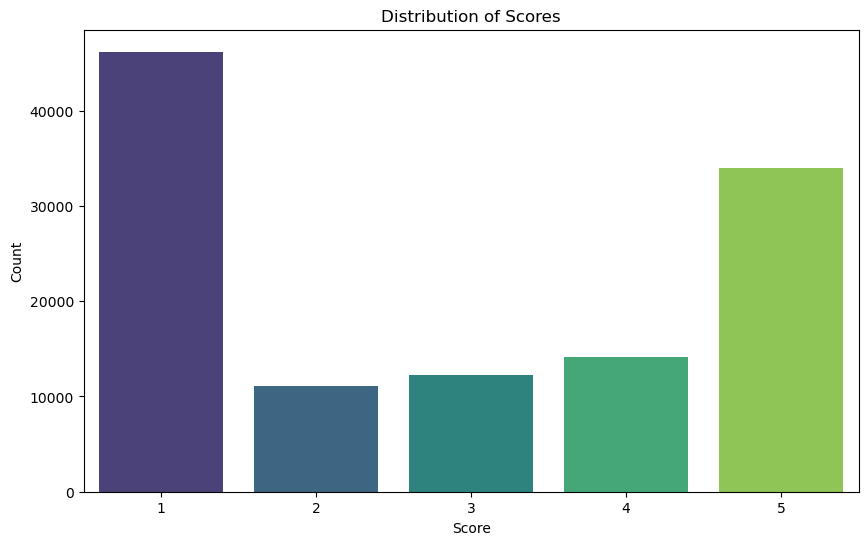

In [25]:
# 리뷰 점수 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='score', data=df, palette='viridis')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.xticks(rotation=0)
plt.show()